<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

# Company packages
import hvec_stat.general_fit as gf

In [2]:
# Settings
plt.rcParams['axes.grid'] = True

#### Connect database and import data

In [3]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [4]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""tijd"" TIMESTAMP,\n..."
1,table,timeseries,timeseries,3,"CREATE TABLE ""timeseries"" (\n""index"" INTEGER,\..."
2,table,const_mnth,const_mnth,4,"CREATE TABLE ""const_mnth"" (\n""tijd"" TIMESTAMP,..."
3,index,ix_const_yr_tijd_naam_level_2,const_yr,5,"CREATE INDEX ""ix_const_yr_tijd_naam_level_2""ON..."
4,index,ix_timeseries_index,timeseries,6,"CREATE INDEX ""ix_timeseries_index""ON ""timeseri..."
5,index,ix_const_mnth_tijd_naam_level_2,const_mnth,7,"CREATE INDEX ""ix_const_mnth_tijd_naam_level_2""..."


In [5]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT naam, tijd, z0, "
    "M2_ampl as M2, S2_ampl as S2, N2_ampl as N2, "
    "K2_ampl as K2, O1_ampl as O1, K1_ampl as K1 "
    "FROM const_yr "
    "WHERE naam IN ('Delfzijl', 'Harlingen', "
    "'Den Helder', 'IJmuiden',  "
    "'Hoek van Holland', 'Vlissingen') "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [6]:
df = df[np.abs(df['z0']) < 1e2]
df = df[np.abs(df['M2']) < 1e2]
df = df[df['tijd'].dt.year < 2022]

In [7]:
df['year'] = df['tijd'].dt.year

In [8]:
names = [
    'Delfzijl',
    'Harlingen',
    'Den Helder',
    'IJmuiden',
    'Hoek van Holland',
    'Vlissingen'
]

#### Mean sea level

In [9]:
def poly1(x, a, b):
    return a * x + b

In [10]:
def poly2(x, a, b, c):
    return a * x**2 + b * x + c

In [11]:
def poly3(x, a, b, c, d):
    return a*x**3 + b * x**2 + c * x + d

In [17]:
def harm60(x, Ac, As, a, b):
    omega = 2 * np.pi / 18.6
    return a*x + b + Ac * np.cos(omega * x) + As * np.cos(omega * x) 

c:\users\hessel voortman\onedrive - hessel voortman ec bv\packages\hvec_stat\hvec_stat\general_fit.py:63: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(cov))
c:\users\hessel voortman\onedrive - hessel voortman ec bv\packages\hvec_stat\hvec_stat\general_fit.py:63: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(cov))
c:\users\hessel voortman\onedrive - hessel voortman ec bv\packages\hvec_stat\hvec_stat\general_fit.py:63: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(cov))
c:\users\hessel voortman\onedrive - hessel voortman ec bv\packages\hvec_stat\hvec_stat\general_fit.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = size)
c:\users\hessel voortman\onedri

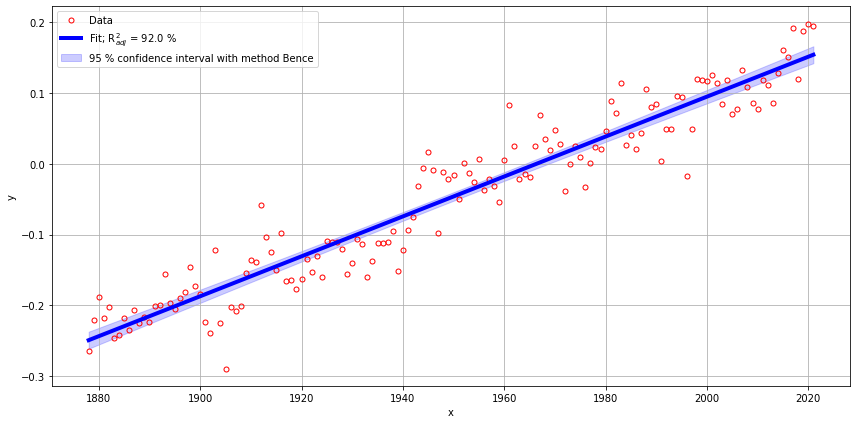

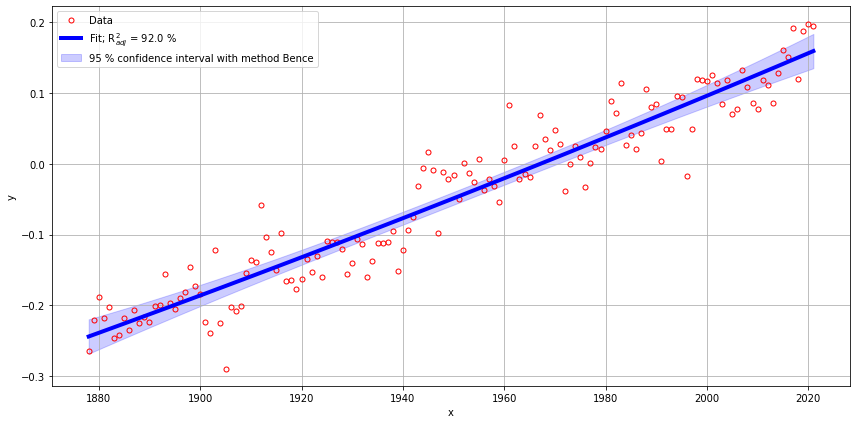

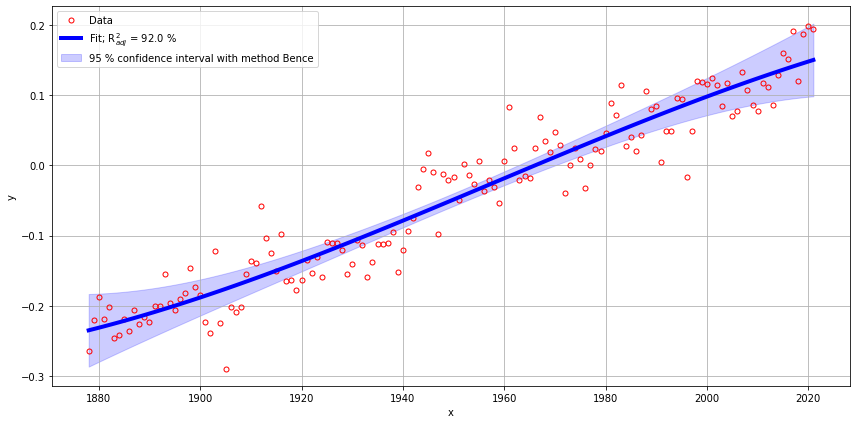

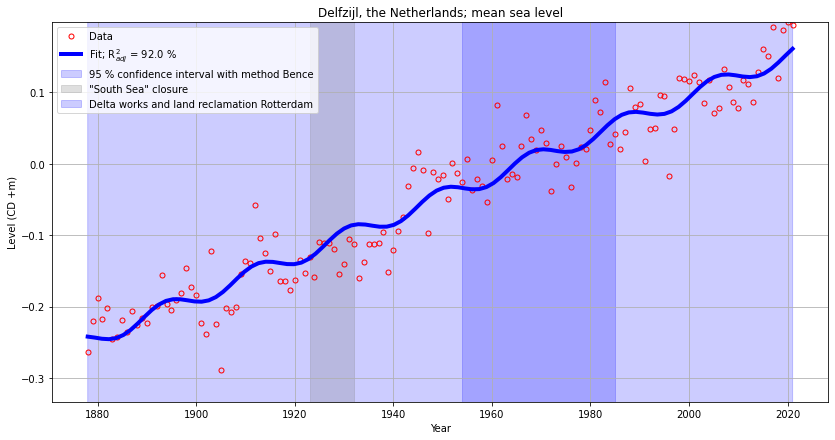

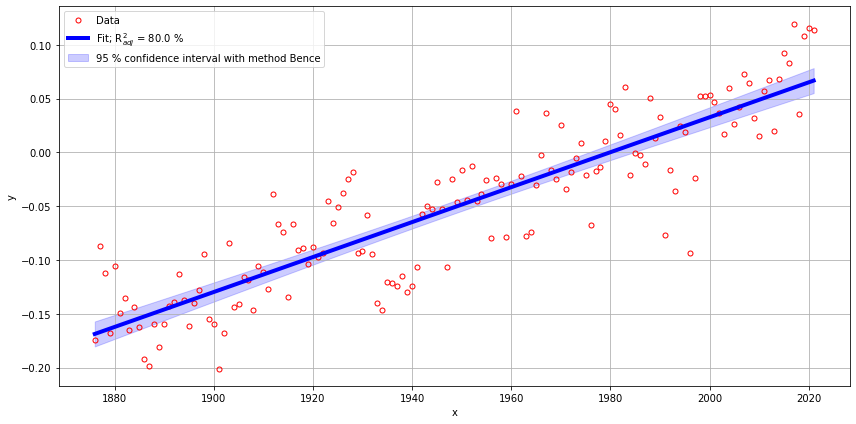

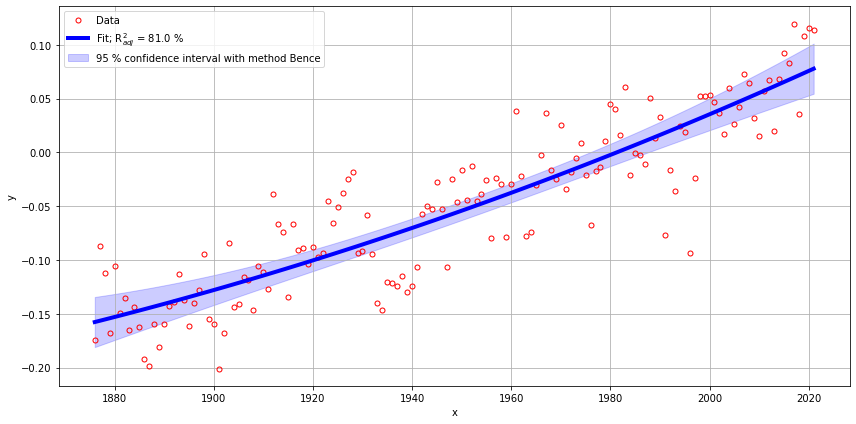

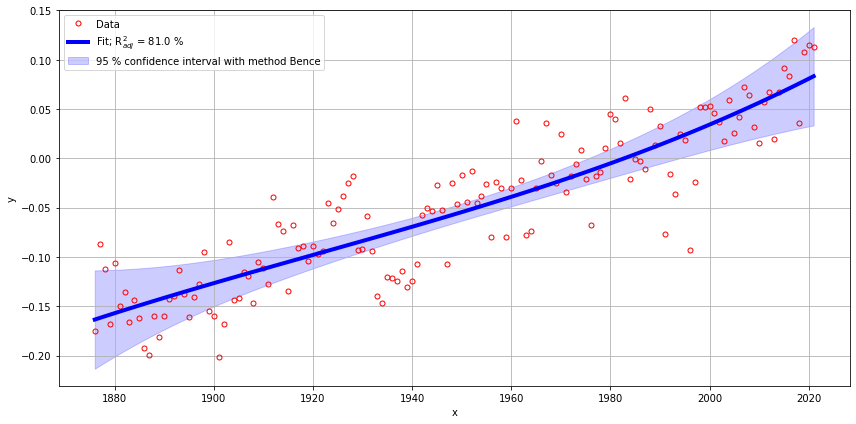

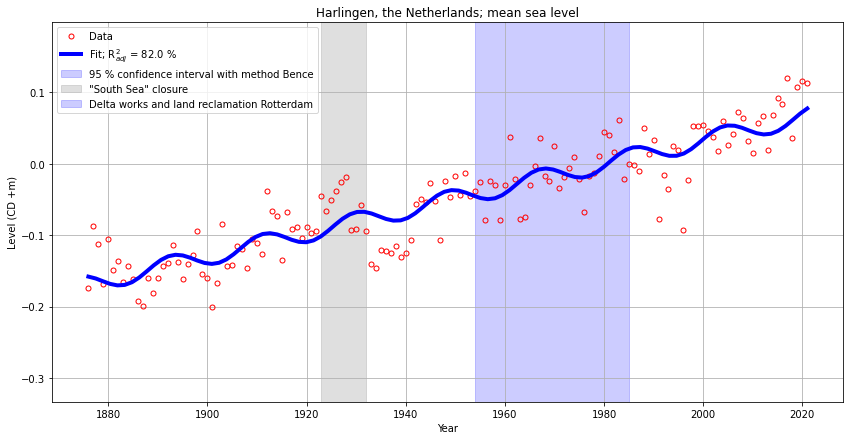

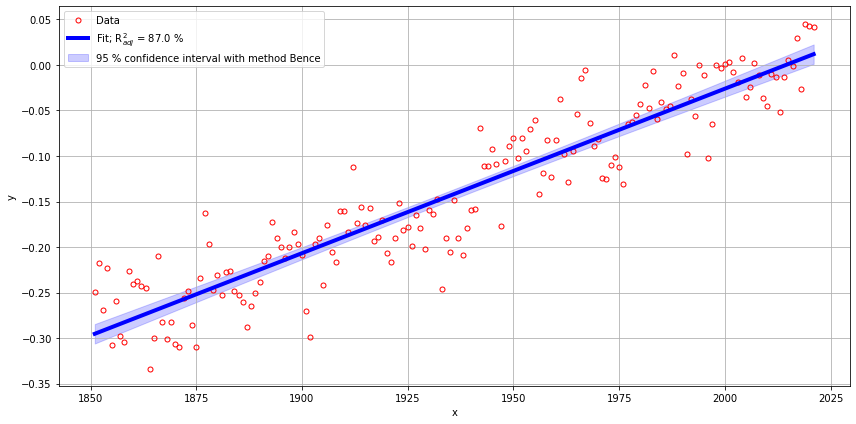

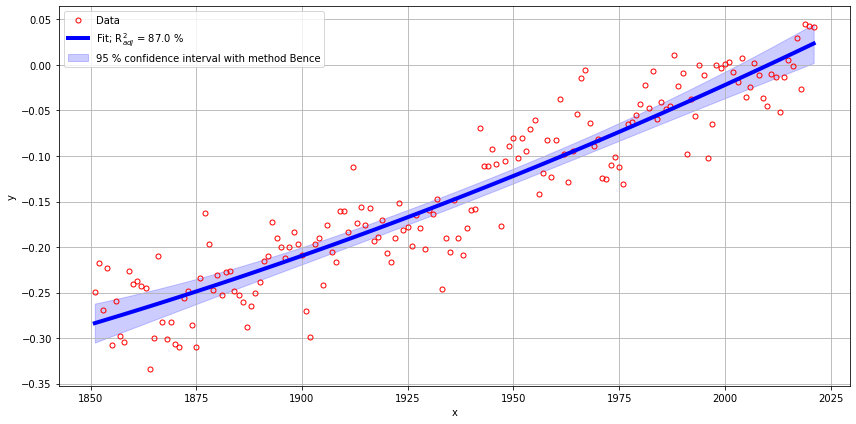

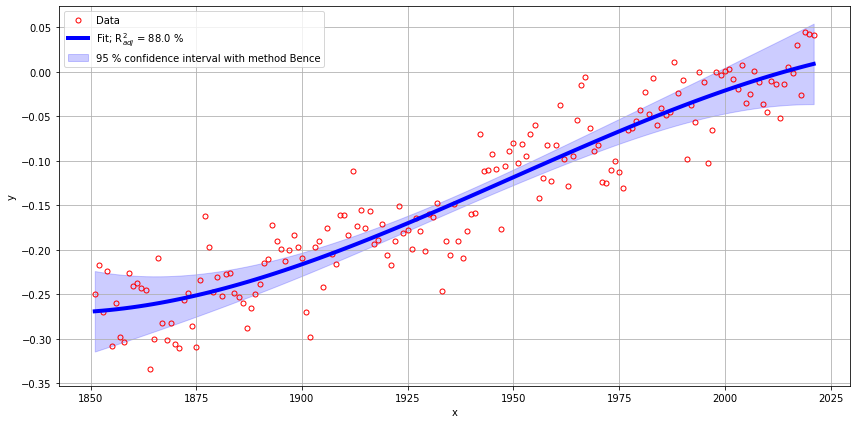

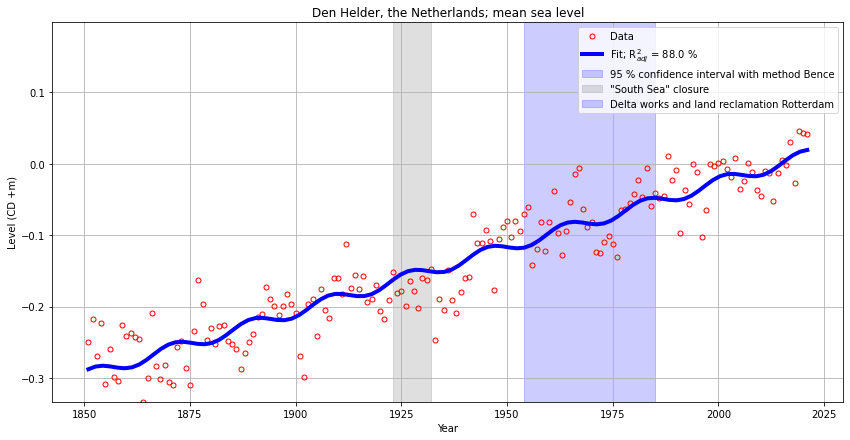

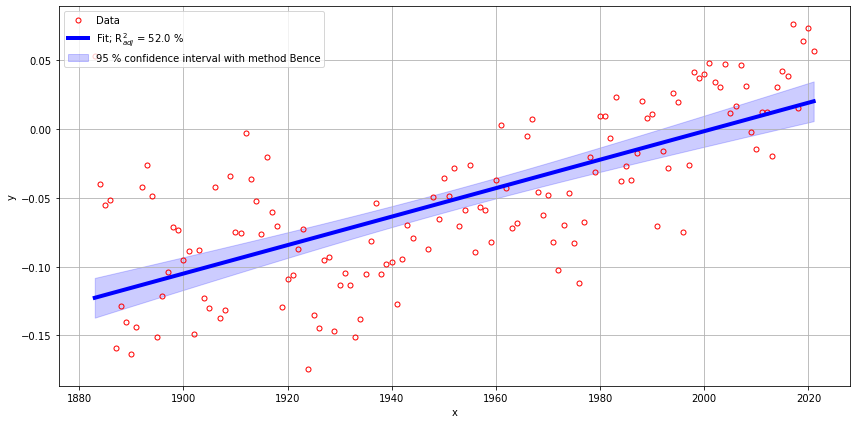

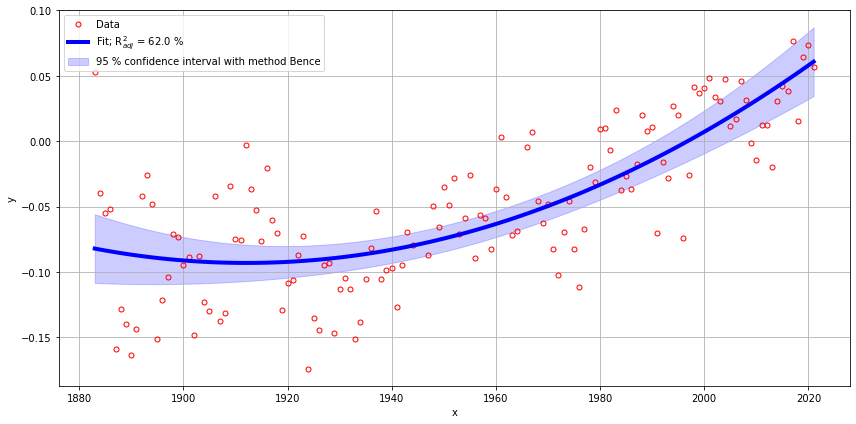

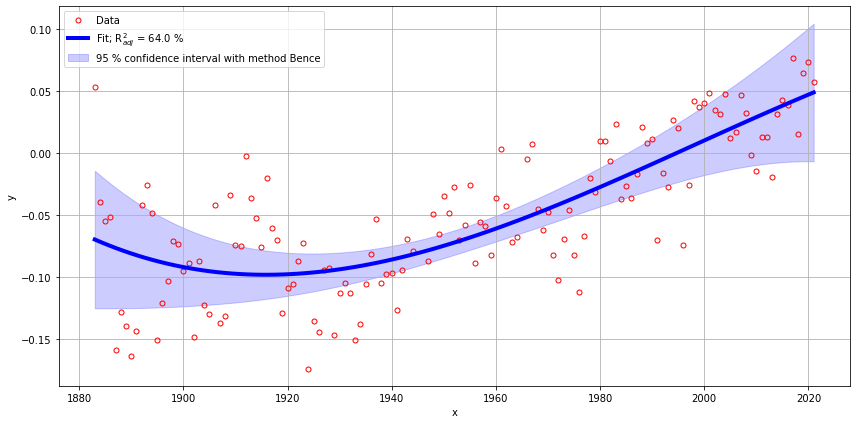

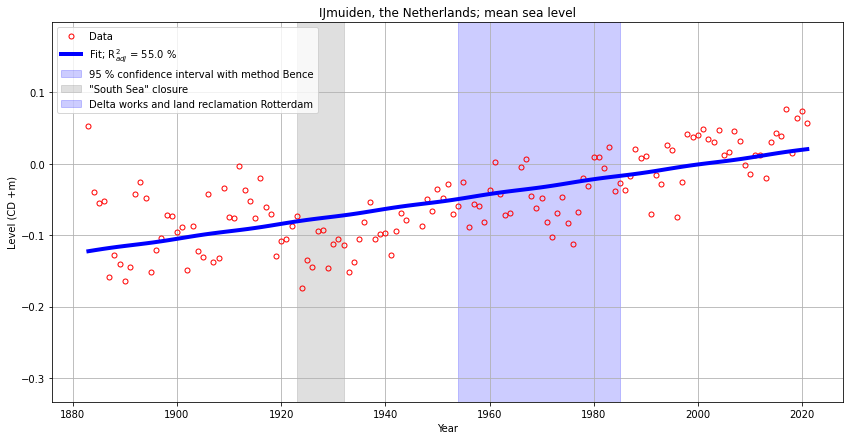

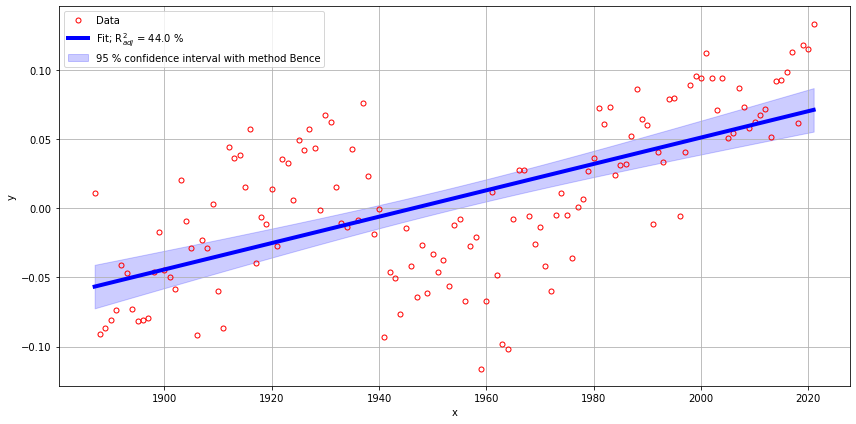

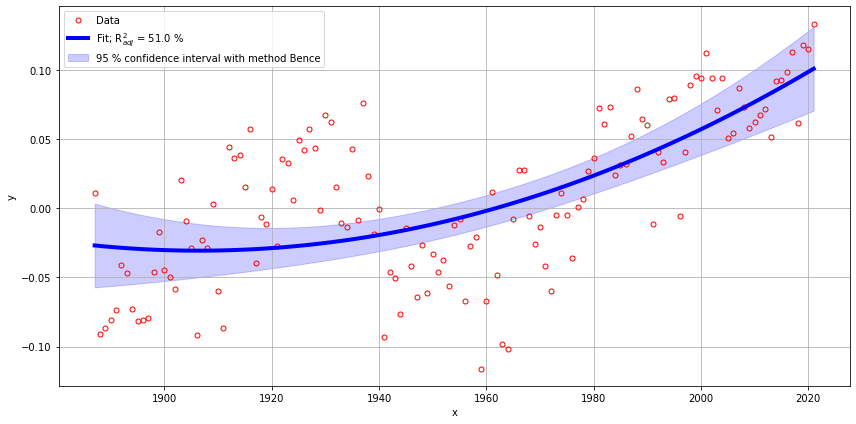

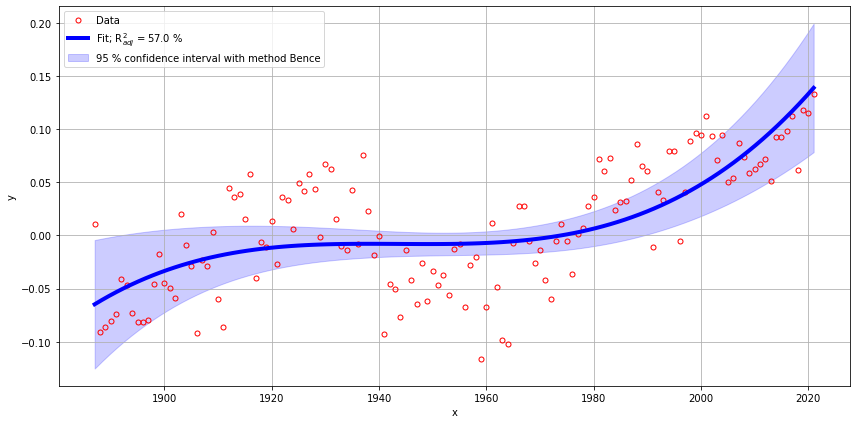

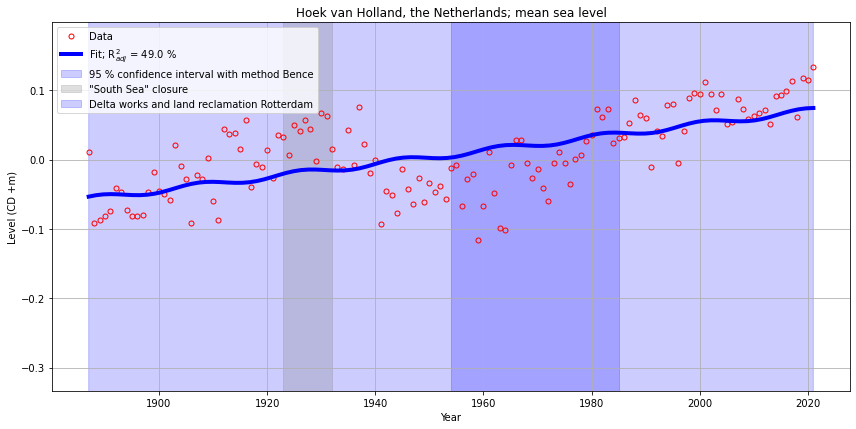

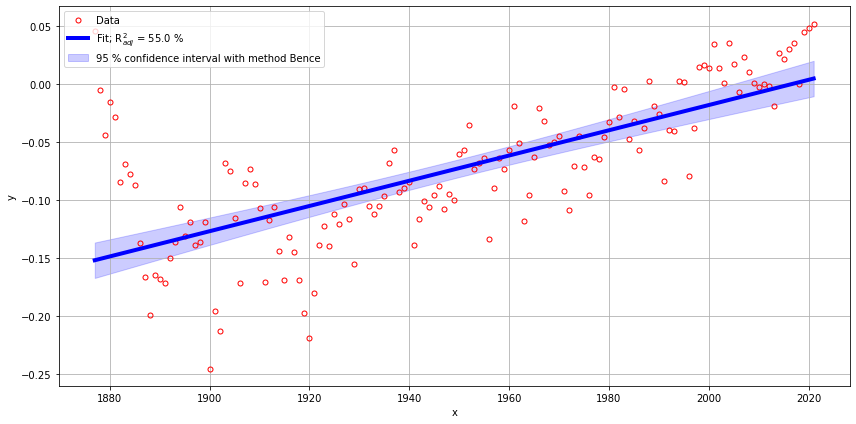

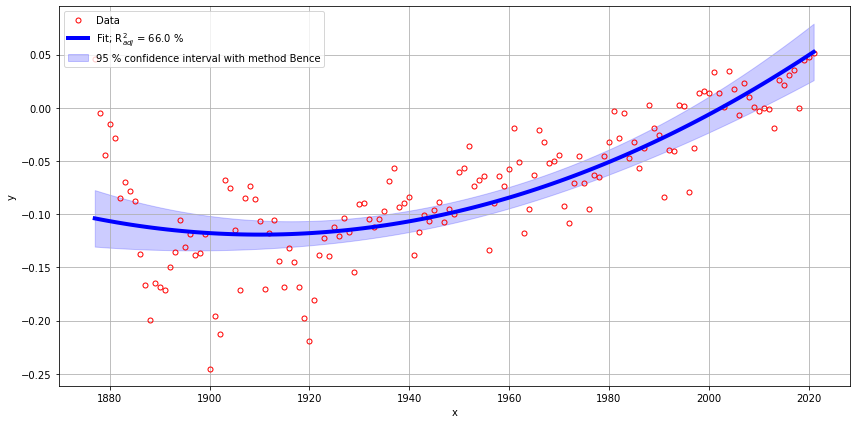

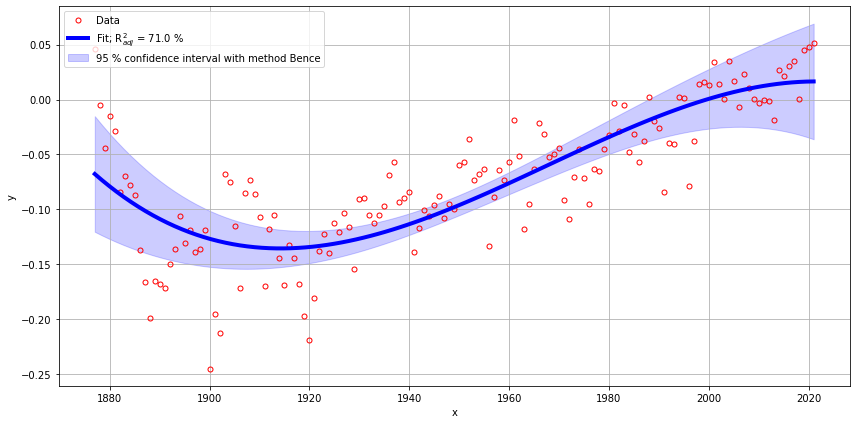

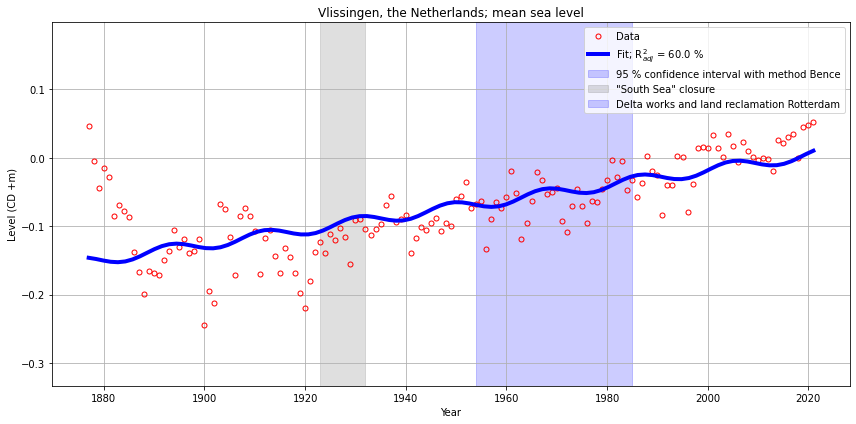

In [18]:
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    x_gr = np.linspace(data['year'].min(), data['year'].max(), 100)
    gf.plot_general_fit(
        poly1,
        x = data['year'], y = data['z0'], x_gr = x_gr,
        size = (12, 6), method = 'Bence', pred_int = False
    )
    gf.plot_general_fit(
        poly2,
        x = data['year'], y = data['z0'], x_gr = x_gr,
        size = (12, 6), method = 'Bence', pred_int = False
    )
    gf.plot_general_fit(
        poly3,
        x = data['year'], y = data['z0'], x_gr = x_gr,
        size = (12, 6), method = 'Bence', pred_int = False
    )
    gf.plot_general_fit(
        harm60,
        x = data['year'], y = data['z0'], x_gr = x_gr,
        size = (12, 6), method = 'Bence', pred_int = False
    )
    plt.ylabel('Level (CD +m)')
    plt.xlabel('Year')
    plt.fill_betweenx(
        y = [-5, 5], x1 = 1923, x2 = 1932,
        color = 'gray', alpha = 0.25, label = '"South Sea" closure')
    plt.fill_betweenx(
        y = [-5, 5], x1 = 1954, x2 = 1985,
        color = 'blue', alpha = 0.2, label = 'Delta works and land reclamation Rotterdam')
    plt.legend(loc = 'best')
    plt.title(nm + ", the Netherlands; mean sea level")
    plt.ylim(df['z0'].min(), df['z0'].max())

plt.tight_layout()
plt.savefig('../pics/MSL_all.jpg');

#### Tides

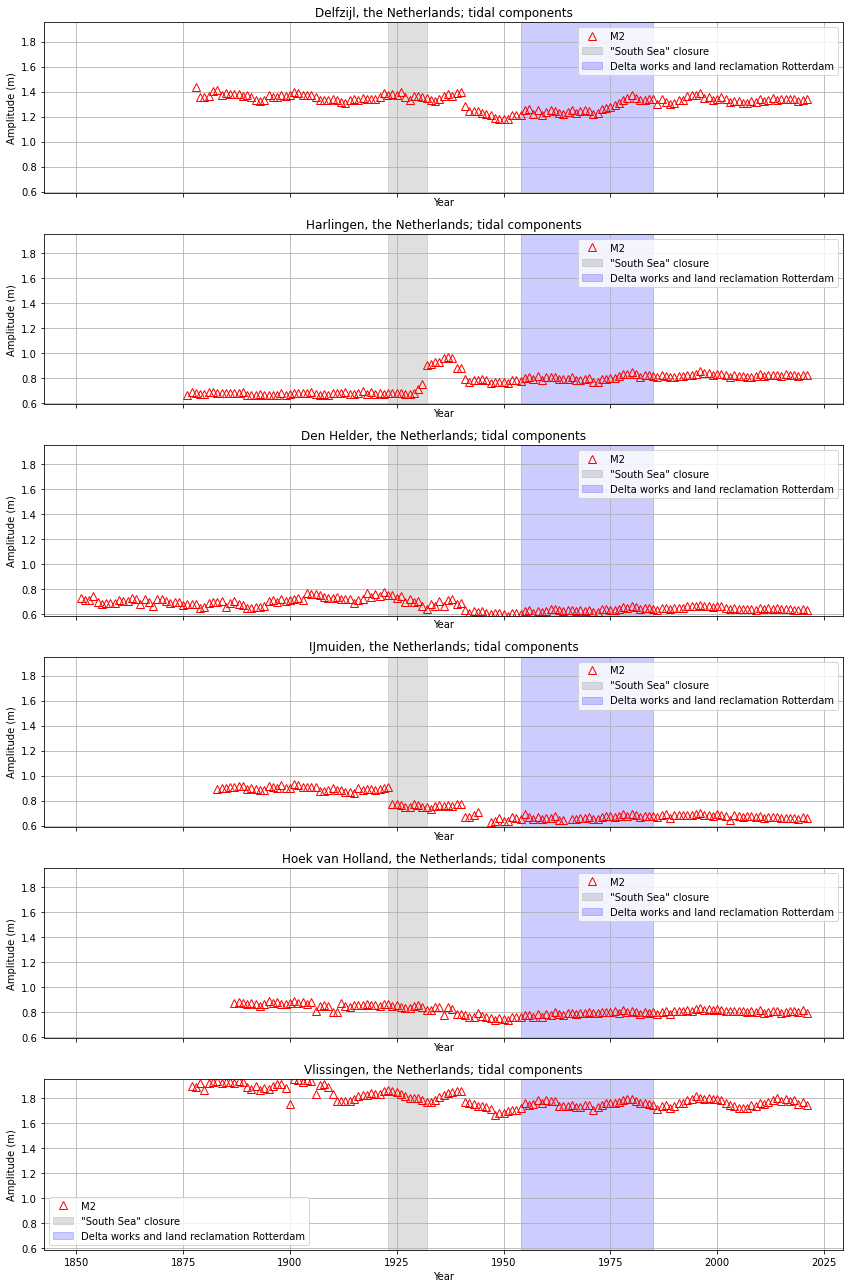

In [14]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = (12, 18))
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['M2'], 'r^', 
        label = 'M2', 
        markersize = 8, mfc = 'none')
    """
    ax[i].plot(
        data['year'], data['S2'], 'rs', 
        label = 'S2', 
        markersize = 8, mfc = 'none')
        """
    ax[i].set_ylabel('Amplitude (m)')
    ax[i].set_xlabel('Year')
    ax[i].fill_betweenx(
        y = [0, 3], x1 = 1923, x2 = 1932,
        color = 'gray', alpha = 0.25, label = '"South Sea" closure')
    ax[i].fill_betweenx(
        y = [0, 3], x1 = 1954, x2 = 1985,
        color = 'blue', alpha = 0.2, label = 'Delta works and land reclamation Rotterdam')
    ax[i].legend()
    ax[i].title.set_text(nm + ", the Netherlands; tidal components")
    ax[i].set_ylim(df['M2'].min(), df['M2'].max())
plt.tight_layout()
plt.savefig('../pics/M2_all.jpg');

#### End script
Prepared by HVEC lab, 2022